<a href="https://colab.research.google.com/github/Narang-Rahul/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import re
import inflect
from collections import OrderedDict
os.chdir("/content/drive/My Drive/NLP")
!ls

'moby dic_clean.txt'  'moby dic.txt'   Uly_clean.txt   Uly.txt


In [ ]:
import nltk,re, pprint
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer

nltk.download('brown')
nltk.download('tagsets') 
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Moby Dick or The Whale, Novel by Herman Melville

f = open('moby dic.txt')
t1 = f.read()

In [ ]:
#lets first look at what we have read
t1[:500] #print first 500 character

'\ufeff\nThe Project Gutenberg EBook of Moby Dick; or The Whale, by Herman\nMelville\n\nThis eBook is for the use of anyone anywhere at no cost and with almost\nno restrictions whatsoever.  You may copy it, give it away or re-use it\nunder the terms of the Project Gutenberg License included with this\neBook or online at www.gutenberg.org\n\n\nTitle: Moby Dick; or The Whale\n\nAuthor: Herman Melville\n\nRelease Date: December 25, 2008 [EBook #2701] Last Updated: December 3,\n2017\n\nLanguage: English\n\nCharacter set enc'

In [ ]:
#since the data is not clean, manually removing thing such as table of contents and also the last section of license by Guenberg 

In [ ]:
#lets see how the new data looks like
f = open('moby dic_clean.txt')
t1 = f.read()
t1[:500]

'\ufeff\nCHAPTER 1. Loomings.\n\nCall me Ishmael. Some years ago—never mind how long precisely—having\nlittle or no money in my purse, and nothing particular to interest me\non shore, I thought I would sail about a little and see the watery part\nof the world. It is a way I have of driving off the spleen and\nregulating the circulation. Whenever I find myself growing grim about\nthe mouth; whenever it is a damp, drizzly November in my soul; whenever\nI find myself involuntarily pausing before coffin warehouses'

In [ ]:
#better but we would like to delete all the chapter titles and so on
#but lets first find them

chapter = re.findall(r'CHAPTER \d+. [\w| ]+',t1)
print(len(chapter))
print(chapter[:10])

135
['CHAPTER 1. Loomings', 'CHAPTER 2. The Carpet', 'CHAPTER 3. The Spouter', 'CHAPTER 4. The Counterpane', 'CHAPTER 5. Breakfast', 'CHAPTER 6. The Street', 'CHAPTER 7. The Chapel', 'CHAPTER 8. The Pulpit', 'CHAPTER 9. The Sermon', 'CHAPTER 10. A Bosom Friend']


In [ ]:
#since we know there are 135 chapters in moby dick, our regex is working
#now lets remove them
t1 = re.sub(r'CHAPTER \d+. [\w| ]+','',t1) 

In [ ]:
#now lets see that chapter names are removed or not
t1[:500]

'\ufeff\n.\n\nCall me Ishmael. Some years ago—never mind how long precisely—having\nlittle or no money in my purse, and nothing particular to interest me\non shore, I thought I would sail about a little and see the watery part\nof the world. It is a way I have of driving off the spleen and\nregulating the circulation. Whenever I find myself growing grim about\nthe mouth; whenever it is a damp, drizzly November in my soul; whenever\nI find myself involuntarily pausing before coffin warehouses, and\nbringing up t'

In [ ]:
special = re.findall(r'\w+[^a-zA-z ]+\w+',t1)
print(special[:10])
special = re.findall(r"\w+\n\w+",t1)
print(special[:10])
special = re.findall(r"[^0-9a-zA-Z]+",t1)
print(special[:10])


['ago—never', 'precisely—having', 'me\non', 'part\nof', 'and\nregulating', 'about\nthe', 'whenever\nI', 'and\nbringing', 'whenever\nmy', 'moral\nprinciple']
['having\nlittle', 'me\non', 'part\nof', 'and\nregulating', 'about\nthe', 'whenever\nI', 'and\nbringing', 'whenever\nmy', 'moral\nprinciple', 'and\nmethodically']
['\ufeff\n.\n\n', ' ', ' ', '. ', ' ', ' ', '—', ' ', ' ', ' ']


In [ ]:
#now we would like to split the words with \n with a space
t1 = re.sub(r'\n',' ',t1) 
t1[:500]

'\ufeff .  Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up t'

In [ ]:
#now we would like to split the words with special characters with a space
t1 = re.sub(r'[^0-9a-zA-Z]+',' ',t1) 
t1[:250]

' Call me Ishmael Some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore I thought I would sail about a little and see the watery part of the world It is a way I have of drivin'

In [ ]:
#this text looks preety clean, now lets see how many times numbers are ouccuring
special = re.findall(r"\d+",t1)
print(len(special))

103


In [ ]:
#lets remove these numbers as well
t1 = re.sub(r'\d+','',t1) 

In [ ]:
t1

' Call me Ishmael Some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore I thought I would sail about a little and see the watery part of the world It is a way I have of driving off the spleen and regulating the circulation Whenever I find myself growing grim about the mouth whenever it is a damp drizzly November in my soul whenever I find myself involuntarily pausing before coffin warehouses and bringing up the rear of every funeral I meet and especially whenever my hypos get such an upper hand of me that it requires a strong moral principle to prevent me from deliberately stepping into the street and methodically knocking people s hats off then I account it high time to get to sea as soon as I can This is my substitute for pistol and ball With a philosophical flourish Cato throws himself upon his sword I quietly take to the ship There is nothing surprising in this If they but knew it almost all men in their de

In [ ]:
#sanity check to see thee are only words and whitespace in it
special = re.findall(r"[^\W\S]",t1)
(special)

[]

In [ ]:
#change everything to lowercase
t1 = t1.lower()
t1

' call me ishmael some years ago never mind how long precisely having little or no money in my purse and nothing particular to interest me on shore i thought i would sail about a little and see the watery part of the world it is a way i have of driving off the spleen and regulating the circulation whenever i find myself growing grim about the mouth whenever it is a damp drizzly november in my soul whenever i find myself involuntarily pausing before coffin warehouses and bringing up the rear of every funeral i meet and especially whenever my hypos get such an upper hand of me that it requires a strong moral principle to prevent me from deliberately stepping into the street and methodically knocking people s hats off then i account it high time to get to sea as soon as i can this is my substitute for pistol and ball with a philosophical flourish cato throws himself upon his sword i quietly take to the ship there is nothing surprising in this if they but knew it almost all men in their de

In [ ]:
# now lets load our second book
f = open('Uly.txt')
t2 = f.read()
t2

'\nThe Project Gutenberg EBook of Ulysses, by James Joyce\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever. You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Ulysses\n\nAuthor: James Joyce\n\nRelease Date: August 1, 2008 [EBook #4300]\nLast Updated: December 27, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ULYSSES ***\n\n\n\n\nProduced by Col Choat, and David Widger.\n\n[Illustration]\n\n\n\n\nUlysses\n\n\nby James Joyce\n\nContents\n\n — I —\n\n [ 1 ]\n [ 2 ]\n [ 3 ]\n\n — II —\n\n [ 4 ]\n [ 5 ]\n [ 6 ]\n [ 7 ]\n [ 8 ]\n [ 9 ]\n [ 10 ]\n [ 11 ]\n [ 12 ]\n [ 13 ]\n [ 14 ]\n [ 15 ]\n\n — III —\n\n [ 16 ]\n [ 17 ]\n [ 18 ]\n\n\n\n\n— I —\n\n\n[ 1 ]\n\nStately, plump Buck Mulligan came from the stairhead, bearing a bowl of\nlather on which a mirror and a razor lay cro

In [ ]:
#since the data is not clean, manually removing thing such as table of contents and also the last section of license by Guenberg 
#lets see how the new data looks like
f = open('Uly_clean.txt')
t2 = f.read()
t2

'\ufeff\n— I —\n\n\n[ 1 ]\n\nStately, plump Buck Mulligan came from the stairhead, bearing a bowl of\nlather on which a mirror and a razor lay crossed. A yellow\ndressinggown, ungirdled, was sustained gently behind him on the mild\nmorning air. He held the bowl aloft and intoned:\n\n—_Introibo ad altare Dei_.\n\nHalted, he peered down the dark winding stairs and called out coarsely:\n\n—Come up, Kinch! Come up, you fearful jesuit!\n\nSolemnly he came forward and mounted the round gunrest. He faced about\nand blessed gravely thrice the tower, the surrounding land and the\nawaking mountains. Then, catching sight of Stephen Dedalus, he bent\ntowards him and made rapid crosses in the air, gurgling in his throat\nand shaking his head. Stephen Dedalus, displeased and sleepy, leaned\nhis arms on the top of the staircase and looked coldly at the shaking\ngurgling face that blessed him, equine in its length, and at the light\nuntonsured hair, grained and hued like pale oak.\n\nBuck Mulligan pee

In [ ]:
#better but we would like to delete all the chapter 1 and so on
#but lets first find them

chapter2 = re.findall(r'\[ \d+ \]',t2)
print(len(chapter2))
print(chapter2[:10])

18
['[ 1 ]', '[ 2 ]', '[ 3 ]', '[ 4 ]', '[ 5 ]', '[ 6 ]', '[ 7 ]', '[ 8 ]', '[ 9 ]', '[ 10 ]']


In [ ]:
t2 = re.sub(r'\[ \d+ \]',"",t2)
t2[:250] 

'\ufeff\n— I —\n\n\n\n\nStately, plump Buck Mulligan came from the stairhead, bearing a bowl of\nlather on which a mirror and a razor lay crossed. A yellow\ndressinggown, ungirdled, was sustained gently behind him on the mild\nmorning air. He held the bowl aloft an'

In [ ]:
#now we would like to split the words with \n with a space
t2 = re.sub(r'\n',' ',t2) 
t2[:500]

'\ufeff — I —     Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned:  —_Introibo ad altare Dei_.  Halted, he peered down the dark winding stairs and called out coarsely:  —Come up, Kinch! Come up, you fearful jesuit!  Solemnly he came forward and mounted the round gunrest. He faced about and blessed gravely'

In [ ]:
#now we would like to split the words with special characters with a space
t2 = re.sub(r'[^0-9a-zA-Z]+',' ',t2) 
t2

' I Stately plump Buck Mulligan came from the stairhead bearing a bowl of lather on which a mirror and a razor lay crossed A yellow dressinggown ungirdled was sustained gently behind him on the mild morning air He held the bowl aloft and intoned Introibo ad altare Dei Halted he peered down the dark winding stairs and called out coarsely Come up Kinch Come up you fearful jesuit Solemnly he came forward and mounted the round gunrest He faced about and blessed gravely thrice the tower the surrounding land and the awaking mountains Then catching sight of Stephen Dedalus he bent towards him and made rapid crosses in the air gurgling in his throat and shaking his head Stephen Dedalus displeased and sleepy leaned his arms on the top of the staircase and looked coldly at the shaking gurgling face that blessed him equine in its length and at the light untonsured hair grained and hued like pale oak Buck Mulligan peeped an instant under the mirror and then covered the bowl smartly Back to barrack

In [ ]:
#lets remove numbers as well
t2 = re.sub(r'\d+','',t2) 

In [ ]:
#sanity check to see thee are only words and whitespace in it
special = re.findall(r"[^\W\S]",t2)
(special)

[]

In [ ]:
#change everything to lowercase
t2 = t2.lower()
t2

' i stately plump buck mulligan came from the stairhead bearing a bowl of lather on which a mirror and a razor lay crossed a yellow dressinggown ungirdled was sustained gently behind him on the mild morning air he held the bowl aloft and intoned introibo ad altare dei halted he peered down the dark winding stairs and called out coarsely come up kinch come up you fearful jesuit solemnly he came forward and mounted the round gunrest he faced about and blessed gravely thrice the tower the surrounding land and the awaking mountains then catching sight of stephen dedalus he bent towards him and made rapid crosses in the air gurgling in his throat and shaking his head stephen dedalus displeased and sleepy leaned his arms on the top of the staircase and looked coldly at the shaking gurgling face that blessed him equine in its length and at the light untonsured hair grained and hued like pale oak buck mulligan peeped an instant under the mirror and then covered the bowl smartly back to barrack

In [ ]:
#lets calculate the total tokens(number of words) of each book
token_t1=word_tokenize(t1)
token_t2=word_tokenize(t2)
print(len(token_t1))
print("- Moby Dick\n")
print(len(token_t2))
print("- Ulysses\n")

214297
- Moby Dick

268857
- Ulysses



In [ ]:
#vocabulary of each book
vocab1 = list(set(token_t1))
print(len(vocab1))
print("- Moby Dick\n")
vocab2 = list(set(token_t2))
print(len(vocab2))
print("- Ulysses\n")

16680
- Moby Dick

28989
- Ulysses



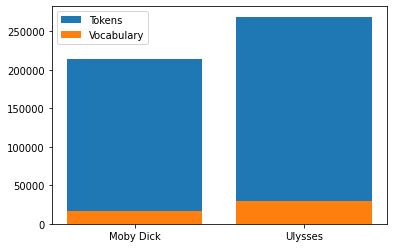

In [ ]:
#tokens vs vocab of each book
book = [len(token_t1),len(token_t2)]
book2 = [len(vocab1),len(vocab2)]
labels = ['Moby Dick','Ulysses']



fig, ax = plt.subplots()
rects1 = ax.bar(labels, book, label='Tokens')
rects2 = ax.bar(labels, book2, label='Vocabulary')
ax.legend()



In [ ]:
#let use a porter stemmer to see the decrease in vocabulary because of words having the same stems
porter = PorterStemmer()
stemmed1 = [porter.stem(word) for word in token_t1]
vocab_s1 = len(list(set(stemmed1)))
print(vocab_s1)
print("- Moby Dick\n")
stemmed2 = [porter.stem(word) for word in token_t2]
vocab_s2 = len(list(set(stemmed2)))
print(vocab_s2)
print("- Ulysses\n")

10459
- Moby Dick

21065
- Ulysses



In [ ]:
#lets view the stemmed tokens
print(stemmed1[:15])
print(stemmed2[:15])

['call', 'me', 'ishmael', 'some', 'year', 'ago', 'never', 'mind', 'how', 'long', 'precis', 'have', 'littl', 'or', 'no']
['i', 'state', 'plump', 'buck', 'mulligan', 'came', 'from', 'the', 'stairhead', 'bear', 'a', 'bowl', 'of', 'lather', 'on']


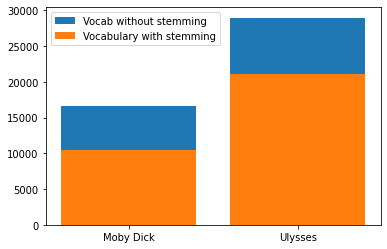

In [ ]:
book2 = [len(vocab1),len(vocab2)]
book3 = [vocab_s1,vocab_s2]
labels = ['Moby Dick','Ulysses']

fig, ax = plt.subplots()
rects1 = ax.bar(labels, book2, label='Vocab without stemming')
rects2 = ax.bar(labels, book3, label='Vocabulary with stemming')
ax.legend()


In [ ]:
fdist1 = FreqDist(stemmed1)
fdist2 = FreqDist(stemmed2)

In [ ]:
fdist1.most_common(50)

[('the', 14078),
 ('of', 6463),
 ('and', 6321),
 ('a', 4631),
 ('to', 4542),
 ('in', 4073),
 ('that', 3045),
 ('it', 2867),
 ('hi', 2493),
 ('i', 2114),
 ('he', 1876),
 ('but', 1805),
 ('s', 1737),
 ('as', 1719),
 ('with', 1692),
 ('is', 1689),
 ('wa', 1628),
 ('for', 1593),
 ('all', 1514),
 ('whale', 1509),
 ('thi', 1495),
 ('at', 1304),
 ('be', 1259),
 ('not', 1211),
 ('by', 1175),
 ('from', 1072),
 ('him', 1058),
 ('so', 1053),
 ('on', 1040),
 ('one', 927),
 ('you', 884),
 ('there', 854),
 ('have', 819),
 ('now', 779),
 ('had', 767),
 ('or', 688),
 ('were', 676),
 ('like', 653),
 ('they', 649),
 ('me', 630),
 ('then', 628),
 ('which', 625),
 ('their', 617),
 ('ship', 612),
 ('what', 611),
 ('some', 608),
 ('when', 601),
 ('an', 590),
 ('my', 587),
 ('are', 587)]

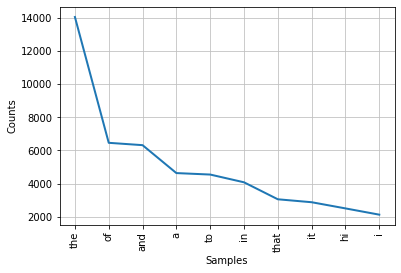

In [ ]:
fdist1.plot(10)

In [ ]:
fdist2.most_common(50)

[('the', 14956),
 ('of', 8144),
 ('and', 7217),
 ('a', 6523),
 ('to', 4960),
 ('in', 4948),
 ('he', 4277),
 ('hi', 3336),
 ('i', 2996),
 ('s', 2832),
 ('that', 2816),
 ('it', 2814),
 ('with', 2515),
 ('wa', 2133),
 ('on', 2117),
 ('you', 2016),
 ('for', 1938),
 ('her', 1809),
 ('him', 1525),
 ('is', 1435),
 ('all', 1325),
 ('at', 1290),
 ('by', 1268),
 ('said', 1208),
 ('she', 1208),
 ('as', 1187),
 ('from', 1088),
 ('be', 1058),
 ('they', 1050),
 ('bloom', 1008),
 ('what', 982),
 ('or', 961),
 ('me', 949),
 ('mr', 922),
 ('not', 906),
 ('out', 899),
 ('my', 838),
 ('up', 829),
 ('there', 819),
 ('had', 814),
 ('have', 810),
 ('like', 796),
 ('say', 796),
 ('one', 758),
 ('their', 725),
 ('but', 701),
 ('t', 683),
 ('no', 683),
 ('them', 672),
 ('an', 656)]

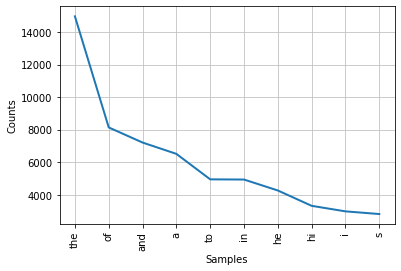

In [ ]:
fdist2.plot(10)

In [ ]:
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate_from_frequencies(fdist1)

wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate_from_frequencies(fdist2)

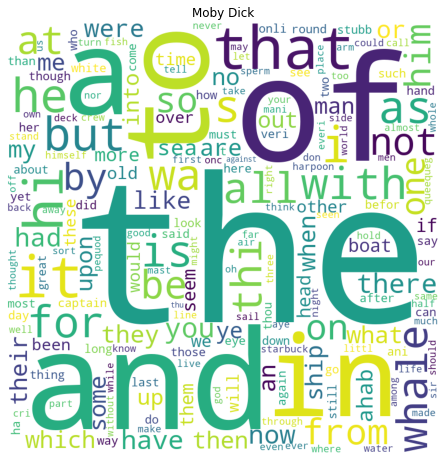

In [ ]:
#wordcloud for Moby Dick
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("Moby Dick")

 
plt.show() 

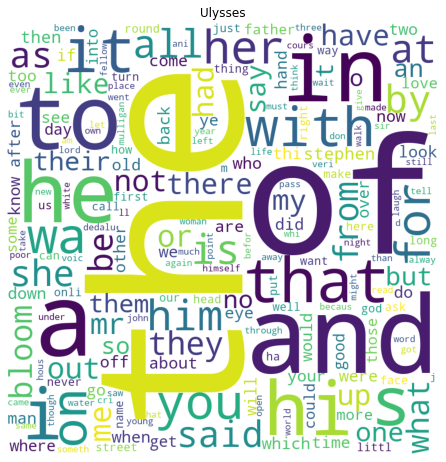

In [ ]:
#word cloud for Ulysses
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("Ulysses")

  
plt.show() 

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = set(stopwords.words('english'))
tokens_without_stopwords_t1 = [w for w in token_t1 if not w in stop_words]
tokens_without_stopwords_t2 = [w for w in token_t2 if not w in stop_words]
print(len(tokens_without_stopwords_t1))
print(len(tokens_without_stopwords_t2))

108109
144537


In [ ]:
#new frequency distributions after using stemming
ax = [porter.stem(word) for word in tokens_without_stopwords_t1]
bx = [porter.stem(word) for word in tokens_without_stopwords_t2]
fdist1_stop = FreqDist(tokens_without_stopwords_t1)
fdist2_stop = FreqDist(tokens_without_stopwords_t2)

In [ ]:
fdist1_stop.most_common(10)

[('whale', 1140),
 ('one', 907),
 ('like', 639),
 ('upon', 561),
 ('man', 528),
 ('ship', 508),
 ('ahab', 505),
 ('ye', 468),
 ('old', 446),
 ('sea', 437)]

In [ ]:
fdist2_stop.most_common(10)

[('said', 1208),
 ('bloom', 1000),
 ('one', 740),
 ('like', 731),
 ('mr', 719),
 ('stephen', 571),
 ('old', 490),
 ('says', 473),
 ('man', 451),
 ('see', 432)]

In [ ]:
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate_from_frequencies(fdist1_stop)

wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate_from_frequencies(fdist2_stop)

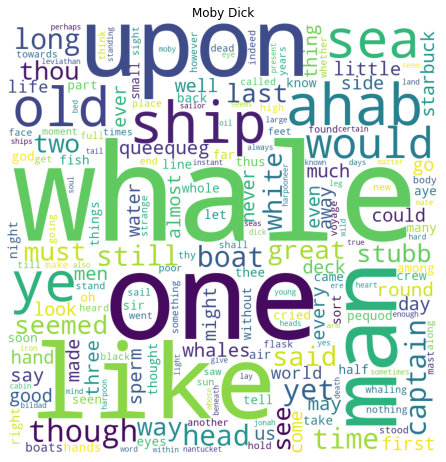

In [ ]:
#wordcloud for Moby Dick
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("Moby Dick")

 
plt.show() 

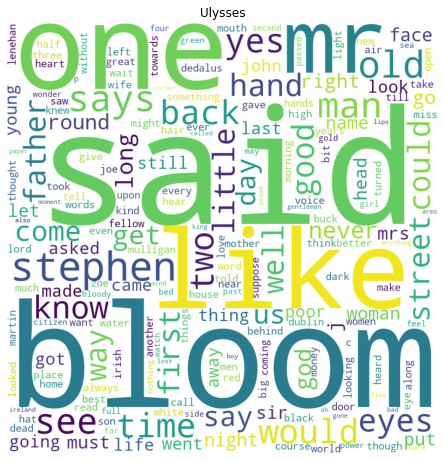

In [ ]:
#word cloud for Ulysses
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("Ulysses")

  
plt.show() 

In [ ]:
#lets look at word length vs frequency of book t1 (Moby Dick)
length_1 = [len(x) for x in t1.split()]
length_freq_1 = FreqDist(length_1)
length_freq_1

FreqDist({1: 8972,
          2: 35014,
          3: 48716,
          4: 41565,
          5: 26026,
          6: 16734,
          7: 13977,
          8: 9778,
          9: 6275,
          10: 3457,
          11: 1840,
          12: 1044,
          13: 554,
          14: 173,
          15: 69,
          16: 21,
          17: 12,
          18: 1,
          20: 1})

Text(0.5, 1.0, 'Length of words vs frequency in Moby Dick')

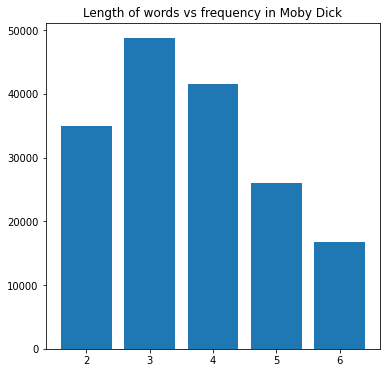

In [ ]:
dic = dict(length_freq_1)
list_f1 =sorted(dic.items(), key=lambda x: x[1], reverse=True)

x=list(map(lambda x: x[0], list_f1))
y=list(map(lambda x: x[1], list_f1))
plt.figure(figsize = (6, 6), facecolor = None) 
plt.bar(x[:5],y[:5])
plt.title("Length of words vs frequency in Moby Dick")

In [ ]:
#lets look at word length vs frequency of book t2 (Ulysses)
length_2 = [len(x) for x in t2.split()]
length_freq_2 = FreqDist(length_2)
length_freq_2 

FreqDist({1: 14956,
          2: 42718,
          3: 58832,
          4: 46946,
          5: 32521,
          6: 23640,
          7: 19464,
          8: 11981,
          9: 7736,
          10: 4703,
          11: 2678,
          12: 1412,
          13: 719,
          14: 291,
          15: 111,
          16: 53,
          17: 30,
          18: 16,
          19: 6,
          20: 6,
          21: 6,
          22: 1,
          23: 1,
          24: 1,
          25: 3,
          26: 3,
          27: 1,
          28: 1,
          30: 1,
          33: 1,
          34: 2,
          36: 1,
          39: 1,
          53: 1,
          71: 1})

In [ ]:
#sanity check for 71 length long word in t2
sentence = t2
longest = max(sentence.split(), key=len)
print("Longest word is: ", longest)
print("And its length is: ", len(longest))

Longest word is:  nationalgymnasiummuseumsanatoriumandsuspensoriumsordinaryprivatdocentge
And its length is:  71


Text(0.5, 1.0, 'Length of words vs frequency in Ulysses')

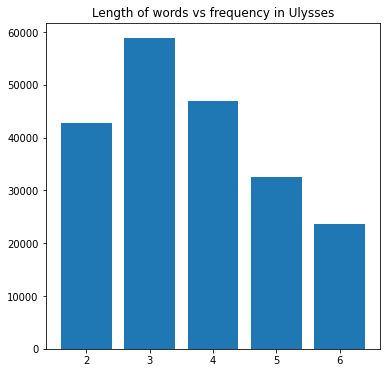

In [ ]:
dic = dict(length_freq_2)
list_f2 =sorted(dic.items(), key=lambda x: x[1], reverse=True)

x=list(map(lambda x: x[0], list_f2))
y=list(map(lambda x: x[1], list_f2))
plt.figure(figsize = (6, 6), facecolor = None) 
plt.bar(x[:5],y[:5])
plt.title("Length of words vs frequency in Ulysses")

In [ ]:
#tagging t1 using penn treebank tagger
tag1 = pos_tag(token_t1)
tag2 = pos_tag(token_t2)

In [ ]:
tag1[:10]

[('call', 'VB'),
 ('me', 'PRP'),
 ('ishmael', 'VB'),
 ('some', 'DT'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('never', 'RB'),
 ('mind', 'VB'),
 ('how', 'WRB'),
 ('long', 'JJ')]

In [ ]:
tag2[:10]

[('i', 'NN'),
 ('stately', 'RB'),
 ('plump', 'JJ'),
 ('buck', 'NN'),
 ('mulligan', 'NNS'),
 ('came', 'VBD'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('stairhead', 'NN'),
 ('bearing', 'VBG')]

In [ ]:
tag_fd1 = nltk.FreqDist(tag for (word, tag) in tag1)
tag_fd2 = nltk.FreqDist(tag for (word, tag) in tag2)

In [ ]:
tag_fd1.most_common(5)

[('NN', 39930), ('IN', 28767), ('DT', 25421), ('JJ', 20081), ('RB', 13980)]

In [ ]:
tag_fd2.most_common(5)

[('NN', 62009), ('IN', 33186), ('DT', 26516), ('JJ', 24021), ('PRP', 15578)]

In [ ]:
dic1 = dict(tag_fd1)

Text(0.5, 1.0, 'Top 10 POS tags of Moby Dick')

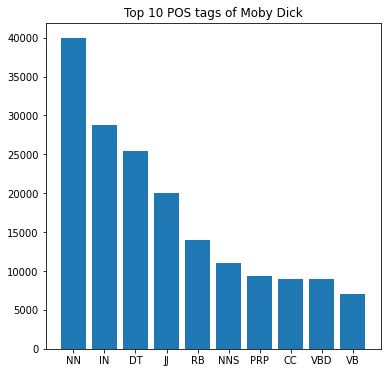

In [ ]:
list1 =sorted(dic1.items(), key=lambda x: x[1], reverse=True)

x=list(map(lambda x: x[0], list1))
y=list(map(lambda x: x[1], list1))
plt.figure(figsize = (6, 6), facecolor = None) 
plt.bar(x[:10],y[:10])
plt.title("Top 10 POS tags of Moby Dick")

Text(0.5, 1.0, 'Top 10 POS tags of Ulysses')

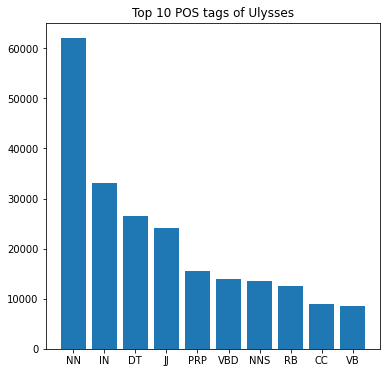

In [ ]:
dic2 = dict(tag_fd2)
list2 =sorted(dic2.items(), key=lambda x: x[1], reverse=True)

x=list(map(lambda x: x[0], list2))
y=list(map(lambda x: x[1], list2))
plt.figure(figsize = (6, 6), facecolor = None) 
plt.bar(x[:10],y[:10])
plt.title("Top 10 POS tags of Ulysses")